In [1]:
## analize results survival 

In [214]:
# once i have wholegenome_offset.trees
import pandas as pd

import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
from collections import defaultdict

In [215]:
pop_size = pd.read_csv('results_pop_size10gen.csv',  index_col=[0])

Decision tree

In [216]:
survival = pop_size['8'].isna().replace({True: 0, False: 1})

In [217]:
survival.name = 'survival'

In [218]:
survival = survival.reset_index()

In [219]:
survival['optima'] = survival['index'].str.split('/').str[-1]

In [220]:
survival['sel'] = survival['index'].str.split('/').str[-2]

In [221]:
survival['freq'] = survival['index'].str.split('_').str[-3]

In [222]:
survival['poly'] = survival['index'].str.split('_').str[-2]

In [223]:
survival['beta'] = survival['index'].str.split('_').str[-1].str.split('/').str[0]

In [224]:
survival = survival.drop('index',axis=1)

In [225]:
## maybe is a good idea to replace optima by extreme, mod and intermediate? 

In [226]:
survival = survival.replace({'optima0': 'ex', 'optima1': 'me', 'optima2': 'int', 'optima3': 'me', 'optima4': 'ex'})

In [227]:
survival.columns

Index(['survival', 'optima', 'sel', 'freq', 'poly', 'beta'], dtype='object')

In [228]:
survival = (survival.groupby(['optima', 'sel', 'freq', 'poly', 'beta'])['survival'].sum() / survival.groupby(['optima', 'sel', 'freq', 'poly', 'beta'])['survival'].size()) * 100

In [229]:
survival = survival.reset_index()

In [230]:
survival['poly_beta'] = survival['poly'] + survival['beta']

In [231]:
survival['optima'].unique()

array(['ex', 'int', 'me'], dtype=object)

In [232]:
order_poly_beta = ['monogenhighbeta','monogenlowbeta',
 'fivepolyhighbeta', 'fivepolylowbeta',
 'twentypolyhighbeta', 'twentypolylowbeta',
 'onehpolyhighbeta', 'onehpolylowbeta']

In [233]:
survival['sel_optima'] = survival['sel'] + survival['optima']

In [234]:
survival['sel_optima'].unique()

array(['lowselex', 'moderateselex', 'strongselex', 'lowselint',
       'moderateselint', 'strongselint', 'lowselme', 'moderateselme',
       'strongselme'], dtype=object)

In [235]:
sel_optima_order = [ 'lowselint', 'moderateselint', 'strongselint',
 'lowselme', 'moderateselme','strongselme',
 'lowselex', 'moderateselex', 'strongselex' ]

In [236]:
survival['sel'].unique()

array(['lowsel', 'moderatesel', 'strongsel'], dtype=object)

In [246]:
#colors
custom_colors = sns.color_palette("Blues", n_colors=3)

In [247]:
colors_full = []

for color in custom_colors:
    colors_full.extend([color] * 3)

In [248]:
sel_order = ['lowsel', 'moderatesel', 'strongsel']

In [249]:
optima_order = ['int', 'me', 'ex']

In [250]:
custom_color_dict = dict(zip(optima_order, custom_colors))

In [251]:
custom_color_dict

{'int': (0.7752402921953095, 0.8583006535947711, 0.9368242983467897),
 'me': (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 'ex': (0.1271049596309112, 0.4401845444059977, 0.7074971164936563)}

In [252]:
survival['freq'].unique()

array(['highfreq', 'lowfreq', 'mediumfreq'], dtype=object)

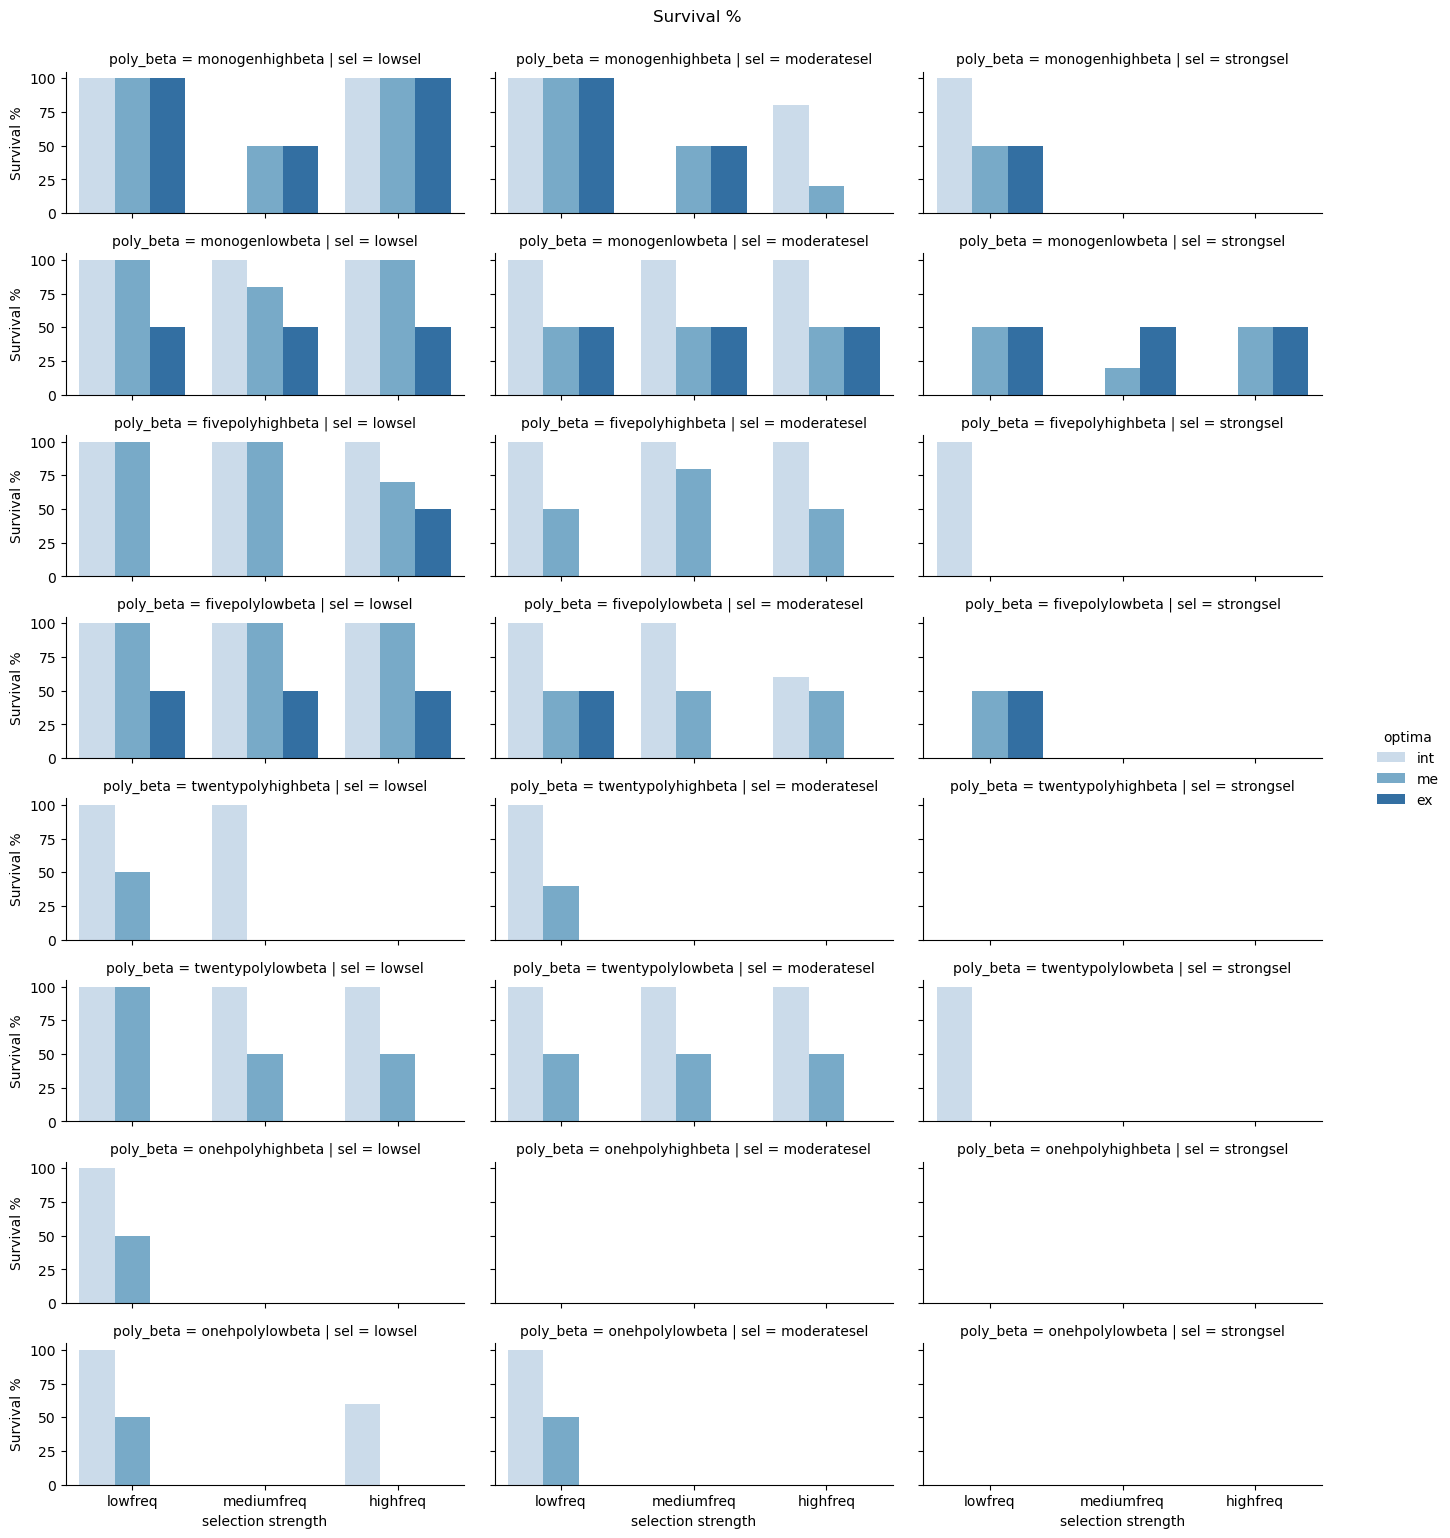

In [253]:

g = sns.catplot(data=survival, x='freq', y='survival', hue='optima', col='sel', row='poly_beta',
                row_order=order_poly_beta, 
                kind="bar", height=2, aspect=1.5,
                palette=custom_color_dict,
                hue_order=optima_order,
                order=['lowfreq','mediumfreq','highfreq']
                #order = ['lowsel', 'moderatesel', 'strongsel']
               )
# Create a facet grid with two additional categorical variables
g.fig.set_figheight(15)
g.fig.set_figwidth(15)
g.fig.suptitle('Survival %', y=1.02)
g.set_axis_labels('selection strength', 'Survival %')

# Show the plot
plt.show()

In [ ]:
survival

In [61]:
survival = survival.replace({'optima0': 2, 'optima1': 1, 'optima2': 0, 'optima3': 1, 'optima4': 2})

In [70]:
survival = survival.replace({'lowsel': 0, 'moderatesel': 1, 'strongsel': 2})

In [73]:
survival = survival.replace({'lowfreq': 0, 'mediumfreq': 1, 'highfreq': 2})

In [76]:
survival = survival.replace({'monogen': 1, 'fivepoly': 5, 'twentypoly': 20, 'onehpoly':100})

In [78]:
survival = survival.replace({'highbeta': 1, 'lowbeta': 0})

In [ ]:
sklearn.preprocessing.OneHotEncoder or pandas.get_dummies

In [79]:
survival

,survival,optima,sel,freq,poly,beta
0,1,2,0,2,5,1
1,0,1,0,2,5,1
2,0,0,0,2,5,1
3,0,1,0,2,5,1
4,0,2,0,2,5,1
...,...,...,...,...,...,...
355,1,2,2,1,20,0
356,1,1,2,1,20,0
357,1,0,2,1,20,0
358,1,1,2,1,20,0


In [92]:
X.columns

Index(['optima', 'sel', 'freq', 'poly', 'beta'], dtype='object')

In [80]:
X = survival.drop('survival',axis=1)

In [81]:
Y = survival['survival']

In [82]:
from sklearn import tree

In [86]:
clf = tree.DecisionTreeClassifier(max_depth=6)

In [87]:
clf = clf.fit(X, Y)

In [ ]:
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)


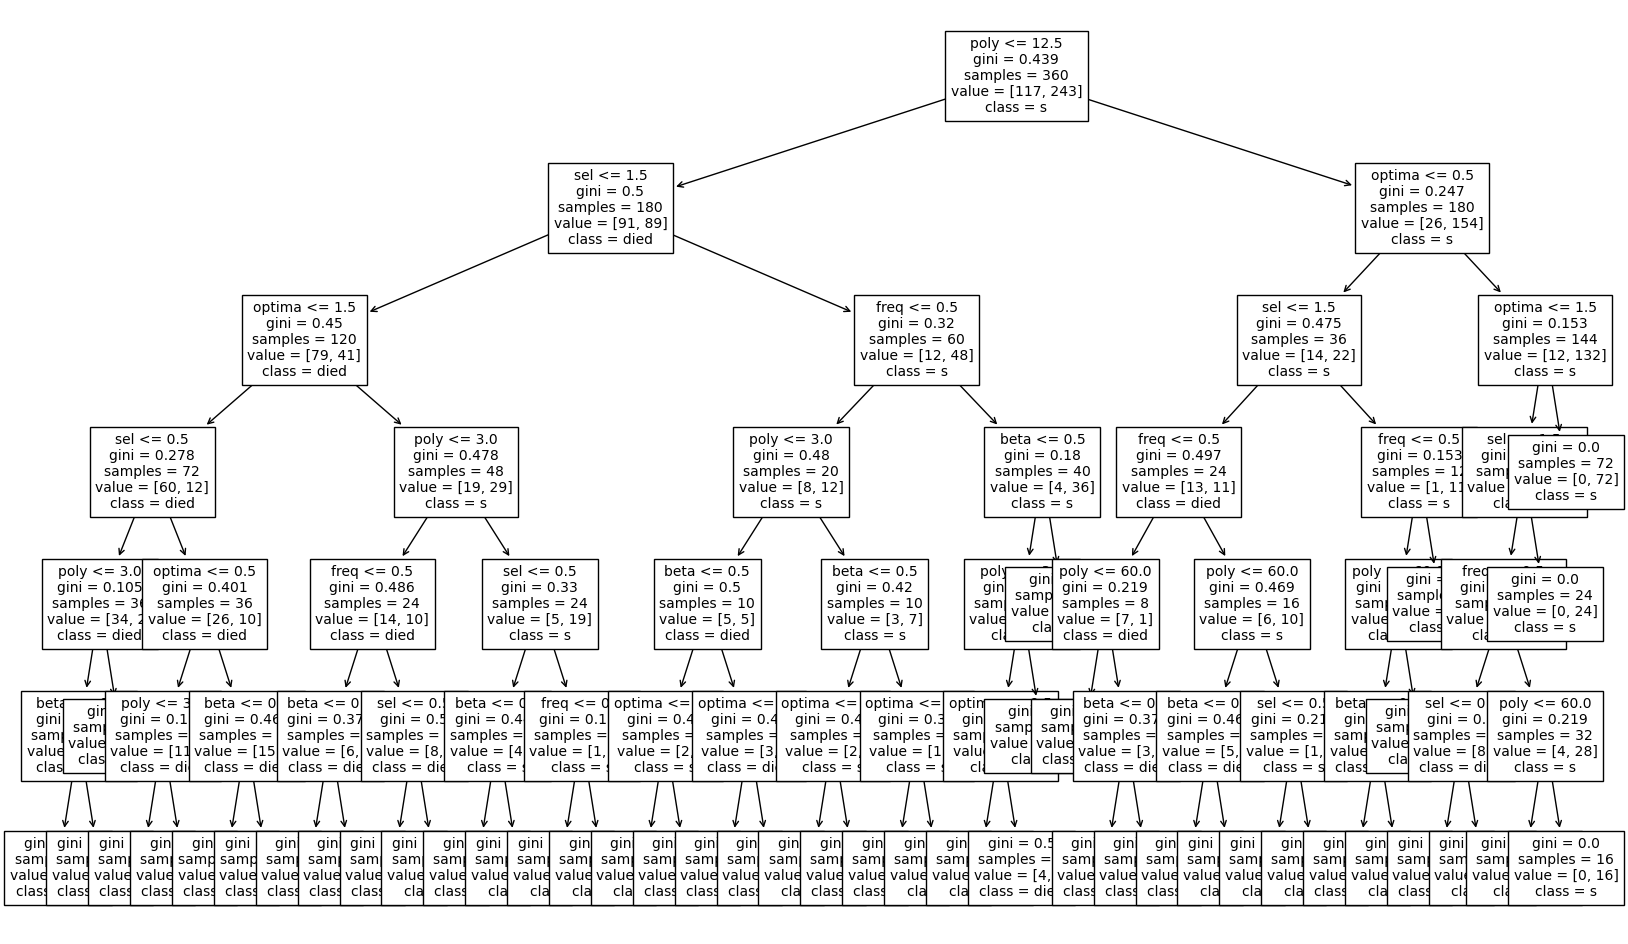

In [96]:

# plot tree
plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10, feature_names = X.columns, class_names=['died', 's'])
plt.show()

[Text(0.6247282608695652, 0.95, 'x[3] <= 12.5\ngini = 0.439\nsamples = 360\nvalue = [117, 243]'),
 Text(0.4016304347826087, 0.85, 'x[1] <= 1.5\ngini = 0.5\nsamples = 180\nvalue = [91, 89]'),
 Text(0.21195652173913043, 0.75, 'x[0] <= 1.5\ngini = 0.45\nsamples = 120\nvalue = [79, 41]'),
 Text(0.06956521739130435, 0.65, 'x[1] <= 0.5\ngini = 0.278\nsamples = 72\nvalue = [60, 12]'),
 Text(0.02608695652173913, 0.55, 'x[3] <= 3.0\ngini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.017391304347826087, 0.45, 'x[4] <= 0.5\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.008695652173913044, 0.35, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.02608695652173913, 0.35, 'x[2] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.017391304347826087, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.034782608695652174, 0.25, 'x[2] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.02608695652173913, 0.15, 'x[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'

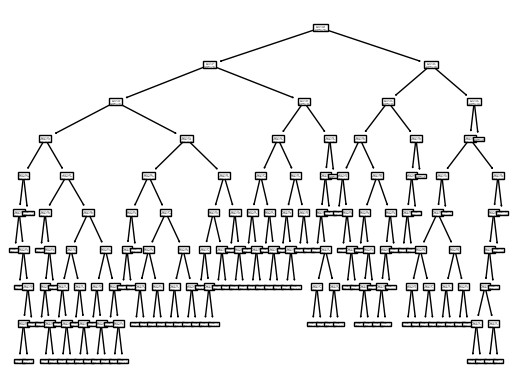

In [85]:
tree.plot_tree(clf);